In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

Defining parameters

In [0]:
epsilon = 0.9
min_epsilon = 0.001
decay_rate = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.8
gamma = 0.9
env = gym.make('FrozenLake-v0')


# Q learning

In [0]:
def choose_action(state):
  action = 0
  if np.random.uniform(0, 1) < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q_qlearning[state, :])
  return action

def learn(state1, state2, reward, action):
  prediction = Q_qlearning[state, action]
  target = reward + gamma * np.max(Q_qlearning[state2, :])
  Q_qlearning[state, action] = Q_qlearning[state, action] + alpha * (target - prediction)


rew_qlearning = []
rew_qlearning.append(0)

Q_qlearning = np.zeros((env.observation_space.n, env.action_space.n))

for episode in range(total_episodes):
  state = env.reset()
  t = 0
  # Decreasing epsilon

  if episode % 100 == 99:
    epsilon *= decay_rate
    epsilon = max(epsilon, min_epsilon)

  while t < max_steps:
    action = choose_action(state)
    state2, reward, done, info = env.step(action)
    learn(state, state2, reward, action)
    state = state2
    t += 1
    if done:
      if reward > 0.0:
        tmp = 1 + rew_qlearning[-1]
        rew_qlearning.append(tmp)
      else:
        tmp = 0 + rew_qlearning[-1]
        rew_qlearning.append(tmp)
      break

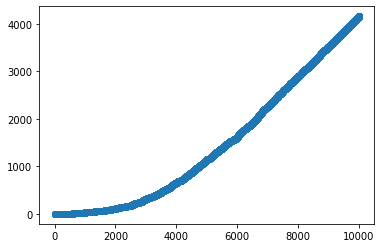

In [47]:
import matplotlib.pyplot as plt
x = [i for i in range(0, len(rew_qlearning))]
plt.scatter(x, rew_qlearning)
plt.show()

# Sarsa

In [0]:
def choose_sarsa_action(state): 
    action=0
    if np.random.uniform(0, 1) < epsilon: 
        action = env.action_space.sample() 
    else: 
        action = np.argmax(Q_sarsa[state, :]) 
    return action 

def update(state, state2, reward, action, action2): 
    predict = Q_sarsa[state, action] 
    target = reward + gamma * Q_sarsa[state2, action2] 
    Q_sarsa[state, action] = Q_sarsa[state, action] + alpha * (target - predict) 

In [0]:
reward=0
rew_srasa = []
done = False
rew_srasa.append(0)
Q_sarsa = np.zeros((env.observation_space.n, env.action_space.n)) 
# Starting the SARSA learning 
for episode in range(total_episodes): 
  t = 0
  state1 = env.reset() 
  action1 = choose_sarsa_action(state1) 
  if episode % 100 == 99:
    epsilon *= decay_rate
    epsilon = max(epsilon, min_epsilon)
  while t < max_steps: 

    state2, reward, done, info = env.step(action1) 
    action2 = choose_sarsa_action(state2) 
    update(state1, state2, reward, action1, action2) 
    state1 = state2 
    action1 = action2 
      
    t += 1 
    if done: 
      if reward > 0.0:
        tmp = 1 + rew_srasa[-1]
        rew_srasa.append(tmp)
      else:
        tmp = 0 + rew_srasa[-1]
        rew_srasa.append(tmp)
      break

env.close()

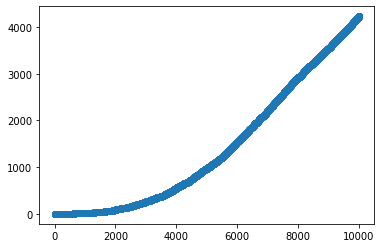

In [53]:
x = [i for i in range(0, len(rew_srasa))]
plt.scatter(x, rew_srasa)
plt.show()

# Expected Sarsa

In [0]:
def choose_action_expected_srasa(state):
  action = 0
  if np.random.uniform(0, 1) < epsilon:
    action = env.action_space.sample()
  else:
    action = np.argmax(Q_exp[state, :])
  return action

def learn_exp(state1, state2, reward, action):
  prediction = Q_exp[state, action]
  target = reward + gamma * np.mean(Q_exp[state2, :])
  Q_exp[state, action] = Q_exp[state, action] + alpha * (target - prediction)


rew_exp = []
rew_exp.append(0)

Q_exp = np.zeros((env.observation_space.n, env.action_space.n))

for episode in range(total_episodes):
  state = env.reset()
  t = 0
  # Decreasing epsilon

  if episode % 100 == 99:
    epsilon *= decay_rate
    epsilon = max(epsilon, min_epsilon)

  while t < max_steps:
    action = choose_action_expected_srasa(state)
    state2, reward, done, info = env.step(action)
    learn_exp(state, state2, reward, action)
    state = state2
    t += 1
    if done:
      if reward > 0.0:
        tmp = 1 + rew_exp[-1]
        rew_exp.append(tmp)
      else:
        tmp = 0 + rew_exp[-1]
        rew_exp.append(tmp)
      break

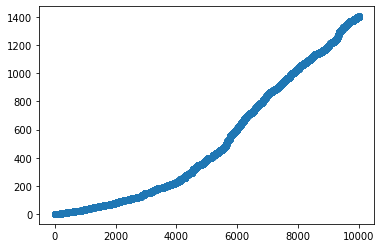

In [56]:
x = [i for i in range(0, len(rew_exp))]
plt.scatter(x, rew_exp)
plt.show()

# Visualize rewards all together

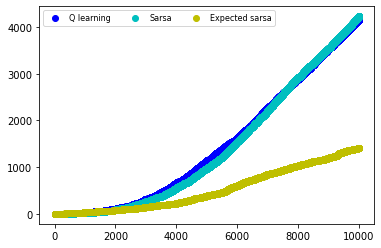

In [60]:
colors = ['b', 'c', 'y', 'm', 'r']

x = [i for i in range(0, len(rew_exp))]
q = plt.scatter(x, rew_qlearning, color=colors[0])
s = plt.scatter(x, rew_srasa, color=colors[1])
e = plt.scatter(x, rew_exp, color=colors[2])

plt.legend((q, s, e),
           ('Q learning', 'Sarsa', 'Expected sarsa'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()